#  INTRODUCTION

As part of my Datacamp Associate Analyst Certification, I used python to analyst project on a Brazillian Fast Food company called VIVENDO. Vivendo is a fast food chain in Brazil with over 200 outlets. Customers often claim compensation from the company for food poisoning. The legal team processes these claims. The legal team has offices in four locations.

# BUSINESS PROBLEM STATEMENT

The head of the legal department wants a report on how each location differs in the time it takes to close claims.

# TOOL USED FOR ANALYSIS

Python.
I used Python in order deliver results with the best insights and recommendations for the head of the legal department and other stakeholders, the Data analysis process will take the steps below.
I took the following steps in order to clean data and validate the dataset
Data Exploration & Validation
DATA Wrangling
DATA Analysis & Visualization

# # DATA EXPLORATION & VALIDATION

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
sn.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("food_claims_2212.csv")
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [3]:
df.isnull().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [5]:
df.shape

(2000, 8)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
claim_id,2000.0,1000.500000,577.494589,1.00,500.75,1000.5,1500.25,2000.00
time_to_close,2000.0,185.568000,49.163390,76.00,158.00,179.0,204.00,518.00
amount_paid,1964.0,21541.975183,12530.156509,1516.72,10995.95,20105.7,30709.35,52498.75
individuals_on_claim,2000.0,8.049500,4.087347,1.00,4.00,8.0,12.00,15.00


In [8]:
#Remove the dollar sign
df["claim_amount"]= df["claim_amount"].str.strip("R$")

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
claim_id,2000.0,1000.500000,577.494589,1.00,500.75,1000.5,1500.25,2000.00
time_to_close,2000.0,185.568000,49.163390,76.00,158.00,179.0,204.00,518.00
amount_paid,1964.0,21541.975183,12530.156509,1516.72,10995.95,20105.7,30709.35,52498.75
individuals_on_claim,2000.0,8.049500,4.087347,1.00,4.00,8.0,12.00,15.00


In [10]:
# I changed claim_amount to float and round it off to 2 decimal places
df["claim_amount"]= df["claim_amount"].astype('float')
round(df[["claim_amount","amount_paid"]],2)
df.head(3)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat


In [11]:
#The Claim_id has 2000 distinct and 2000 unique values. There are no missing values
df["claim_id"]= df["claim_id"].astype('object')

In [12]:
#amount_paid:the overall median
round(df.amount_paid.median(),2)

20105.7

In [14]:
# Replace missing values with the overall median amount paid i.e 20105.7
df.amount_paid.fillna(20105.7,inplace = True)

In [15]:
# linked_cases :Replace missing values with FALSE.
maps= {False:"FALSE",True:"TRUE"}
df["linked_cases"]= df["linked_cases"].replace(maps)
df.linked_cases.fillna("FALSE",inplace = True)

In [16]:
#Cause column has three distinct causes. There are no missing values in the cause column
# I need to format meat,Meat, vegetable and VEGETABLES
df.cause.unique()

array(['unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'],
      dtype=object)

In [ ]:
# Remove the empty spaces and format the data
df["cause"]= df["cause"].str.strip()
df["cause"] = df["cause"].replace({"VEGETABLES":"vegetable","Meat":"meat"})

In [18]:
df.cause.unique()

array(['unknown', 'meat', 'vegetable'], dtype=object)

# TASK 1

In [ ]:
a. State whether the values match the description given in the table above.
The  dataset contains 2000 rows and 8 columns . I need to check for missing values and spelling errors in each column. Due to data type error from the claim_amount column, I removed the currency signs from every record in the column and changed the format to floating type .I noticed the cause column contains  spelling errors, as in the case, ‘vegetable’ is written in lower case, while others were written in Upper case as ‘VEGETABLES’. Similarly, I also noticed spelling error ‘meat’ and 'Meat' values.  I changed the 'Meat' to 'meat'.Similarly, I also formatted ‘VEGETABLES’ to 'vegetable' . Finally, the cause column now has 3 distinct values (‘unknown’, ‘meat’, and ‘vegetable’). 
b. State the number of missing values in the column.
amount_paid : There are 36 missing values in the column.
linked_cases: There are 26 missing values  
The Claim_id has 2000 distinct and 2000 unique values. There are no missing values.
claim_amount: I removed the currency signs from every record in the column. There are no missing values.
Time_to_close: The days in the time-to-close column has the minimun and maximum numbers are 76 and 516 and all values are non-negative. There are 256 distinct values. There are no missing values.
Location: The location column has 4 distinct locations. There are no missing values.
Amount_paid : There are 36 missing values from the column. I filled the missing values with the median(20105.7) and round it off to 2 decimal places.
Linked_cases: There are 26 missing values In the  column. I filled the missing values with 'FALSE'.
Cause column :Has three distinct causes. There are no missing values in the cause column but we have some spelling errors and empty spaces in the column.I need to remove the empty spaces and  replaced any inconsistence values like 'Meat' and 'VEGETABLES' to lower case. The cause column now has 3 distinct values (‘unknown’, ‘meat’, and ‘vegetable’). 
c. Describe what you did to make values match the description if they did not match .
Concerning  the fields’ requirements, each field's values matched the corresponding values.


# TASK 2

Create a visualization that shows the number of claims in each location.

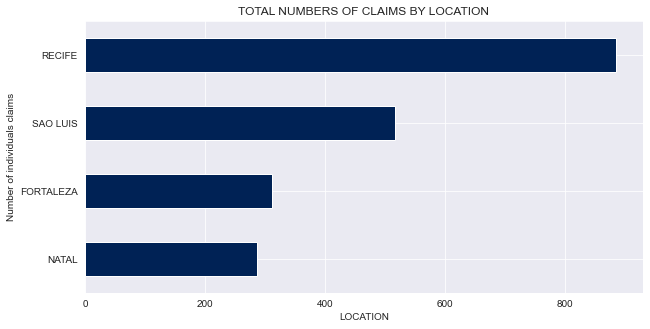

In [41]:
df.location.value_counts().sort_values().plot(kind = "barh" , color = "#025", figsize=(10,5))
plt.xlabel("LOCATION")
plt.ylabel("Number of individuals claims")
plt.title("TOTAL NUMBERS OF CLAIMS BY LOCATION");

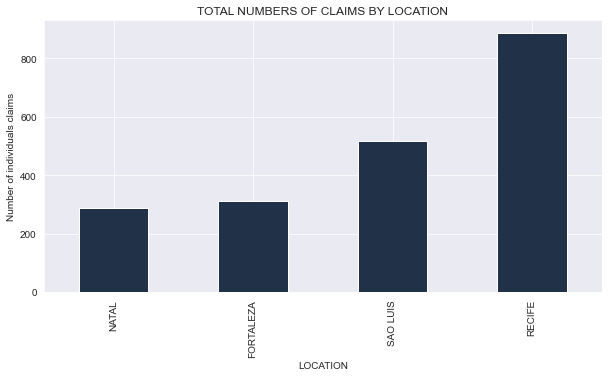

In [49]:
df.location.value_counts().sort_values().plot(kind = "bar" , color = "#213147", figsize=(10,5))
plt.xlabel("LOCATION")
plt.ylabel("Number of individuals claims")
plt.title("TOTAL NUMBERS OF CLAIMS BY LOCATION");

In [ ]:
diabetes prediction/Diabetes prediction using logistic regression.ipynb

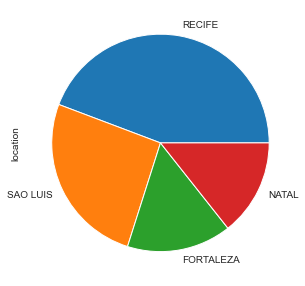

In [47]:
df.location.value_counts().plot(kind = "pie" ,  figsize=(10,5));


In [48]:
# df.location.value_counts().nlargest().plot(kind = "bar" , color = "#025", figsize=(10,5))
# plt.xlabel("LOCATION")
# plt.ylabel("Number of individuals claims")
# plt.title("TOTAL NUMBERS OF CLAIMS BY LOCATION");

a. State which category of the variable location has the most observations
The location with the highest claims is RECIFE with 885 claims.
SAO LUIS has a record of 517 claims.
FORTALEZA  has 311 claims.
NATAL has the lowest number of claims of 286 claims.
b. Explain whether the observations are balanced across categories of the
variable location.
From the above above,it is obvious that observations are imbalanced across categories of the variable location when considering the total number of claims in each location. The total number of claims for each location indicates the total amount of claims made in each location and shows that there is a discrepancy in the claims for each location.
Mathematically ,
RECIFE       0.4425
SAO LUIS     0.2585
FORTALEZA    0.1555
NATAL        0.1435
The percentage of total claims from RACIFE is 44%
The percentage of total claims from SAO LUIS is 26%
The percentage of total claims from FORTALEZA is 16%
The percentage of total claims from NATA is 14%

# ## Task 3

Describe the distribution of time to close for all claims. Your answer must include a
visualization that shows the distribution.

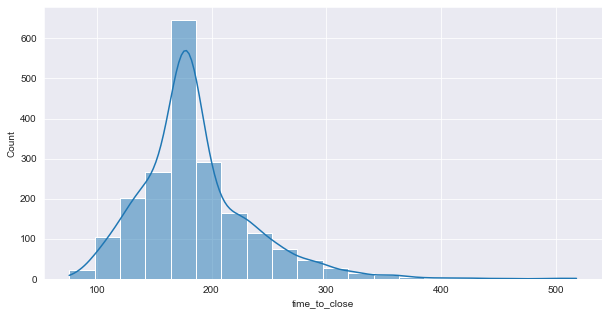

In [31]:
plt.figure(figsize=(10,5))
sn.histplot(data=df, x="time_to_close",kde = True,bins=20);

In the histogram above, you can see that it is a unimodal distribution because it has only one peak near 200. Most values in the dataset will be close to 200, and values further away are rarer. The distribution is roughly symmetric and the values fall between approximately 100 and 400.

## Task 4


Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship.

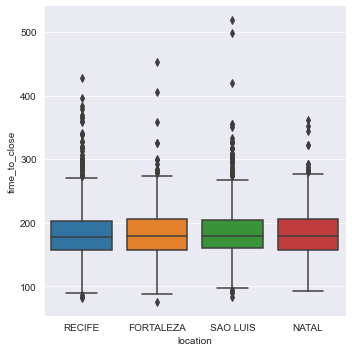

In [33]:
sn.catplot(x="location",y="time_to_close", data = df,kind="box");

From the above visualization, I can observe that we a lot numbers customers in Sao Luis, followed by Fortaleza and least is in Natal.The number of days to close the claim in Sao Luis and Fortaleza is very high. The team has to focus more on Sao Luis location and Fortaleza location to investigate more on the customers claims and make the necessary adjustments.